5дз

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
  
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

rng.current = 1
samples = [rng() for _ in range(10)]

№1

In [ ]:
def serial_test(n, samples):
    f_obs = np.histogram2d(samples[::2], samples[1::2],n)
    f_exp = np.full(n*n, len(samples)//(2*n*n))
    print(stats.chisquare(f_obs[0].reshape(n**2,), f_exp)) 
serial_test(10, samples)

№2

In [155]:
import math
import itertools
import matplotlib
def permutationtest(d, samples):
    f_obs=np.zeros(math.factorial(d))
    for j in range(d, len(samples) + 1, d):
        s = 0
        for i in itertools.permutations(sorted(samples[j - d : j])):
            if samples[j - d : j] == list(i):
                f_obs[s] += 1
                break
            s+=1
    f_exp=np.full(math.factorial(d), len(samples) // (math.factorial(d) * d))
    print(stats.chisquare(f_obs, f_exp))
permutationtest(2, samples)

Power_divergenceResult(statistic=0.3082666666666667, pvalue=0.578745780684579)


№3

In [58]:
random = [rng_bad() for _ in range(30000)] 
samples = [rng() for _ in range(30000)] 
print(stats.kstest(samples, stats.uniform.cdf))
print(stats.kstest(random, stats.uniform.cdf))

KstestResult(statistic=0.0028967604598650887, pvalue=0.9621976069190198)
KstestResult(statistic=0.008834441990405284, pvalue=0.0183958345985172)


ну вроде номер 3 с ks как указано в группе подходит 

№4

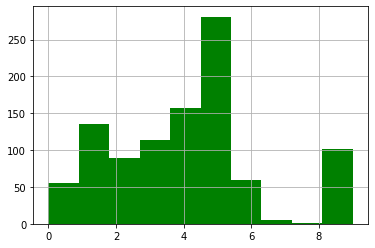

In [102]:
def alg():
    old = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
    w = np.sort(old)
    num = np.argsort(old)
    new=np.zeros(11)
    for i in range(1, 11):
      new[i] = new[i - 1] + w[i - 1]
    c = np.random.rand() * 2.009
    for i in range (10): 
        if(new[i]<= c < new[i+1]):
          return num[i]

hist = [alg() for i in range(1000)]
plt.hist(hist, color = "green")
plt.grid()
plt.show()

№5

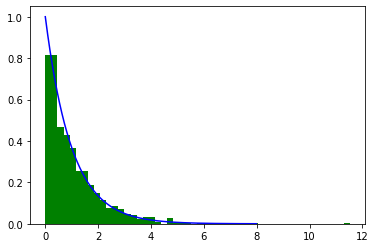

In [121]:
import math
def f(l):
  a = np.random.rand()
  return ((-math.log(1 - a))/l)
l=1
exp = [f(l) for i in range(1000)]
plt.hist(exp, color = "green",bins = 50, density = True)
x = np.arange(0, 8, 0.01)
plt.plot(x, np.exp(-x), color = "blue")
plt.show()


№6

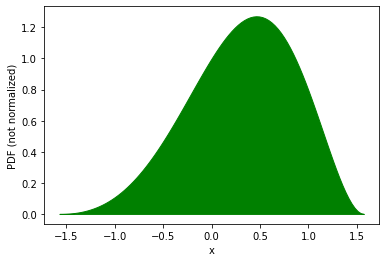

1.2718704708119917

In [126]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density,color = "green")
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()
q = 1/(max(density)*np.pi)
max(density)

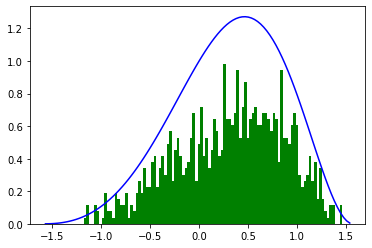

In [132]:
def pif():
    a = (np.random.rand() - 0.5)*np.pi
    b = np.random.rand()
    while  b > np.exp(a)*q*np.cos(a)**2:
      a = (np.random.rand() - 0.5) * np.pi
      b =  np.random.rand()
    return [a,b]
random = [pif() for i in range(1000)]
x = [random[i][0] for i in range(1000)]
y = [random[i][1] for i in range(1000)]
plt.hist(x , bins = 100, density = True, color = "green")
X = np.arange(-np.pi/2, np.pi/2, np.pi/100)
plt.plot(X, np.exp(X) * np.cos(X)**2 ,color = "blue")
plt.show()

# №7

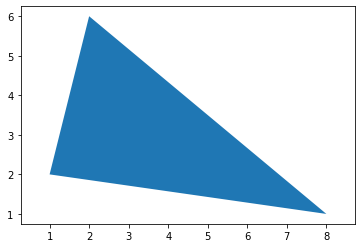

In [133]:
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

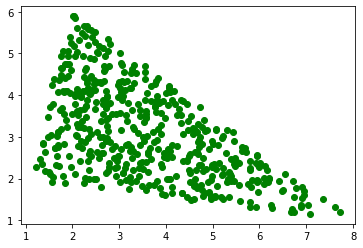

In [137]:
x = np.array([np.random.rand() for i in range(500)])
y = np.array([np.random.rand() for i in range(500)])
x[(x + y) > 1] = 1 - x[(x + y) > 1] #подсказали этот ход
y[(x + y) > 1] = 1 - y[(x + y) > 1] 
x_= np.array([np.random.rand() for i in range(500)])
x_ =  (7 * x + 1 * y + 1)
y  =  (-1 * x + 4 * y +  2)
plt.scatter(x_, y, color = 'green')
plt.show()

№8

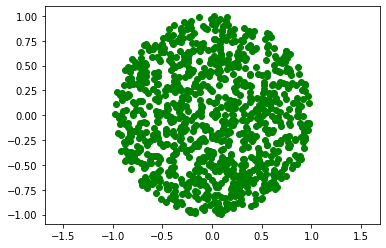

In [143]:
r = np.array([np.random.rand() for i in range(1000)])
g = np.array([2*np.pi *np.random.rand() for i in range(1000)])
x = np.sqrt(r)*np.cos(g)# эту уже сам)
y = np.sqrt(r)*np.sin(g)
plt.axis('equal')
plt.scatter(x,y, color = 'green')
plt.show() 

№9

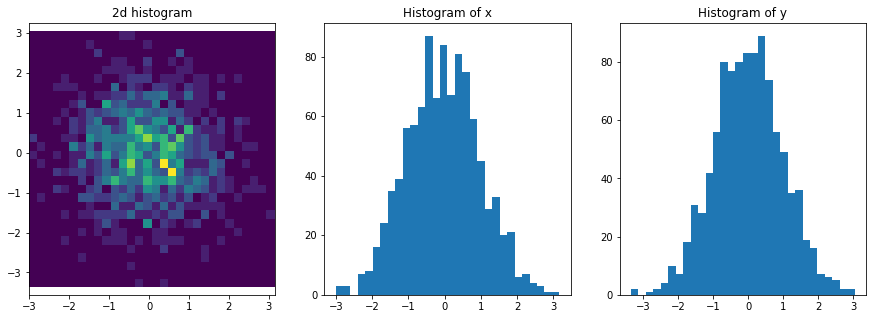

In [156]:
%matplotlib inline

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

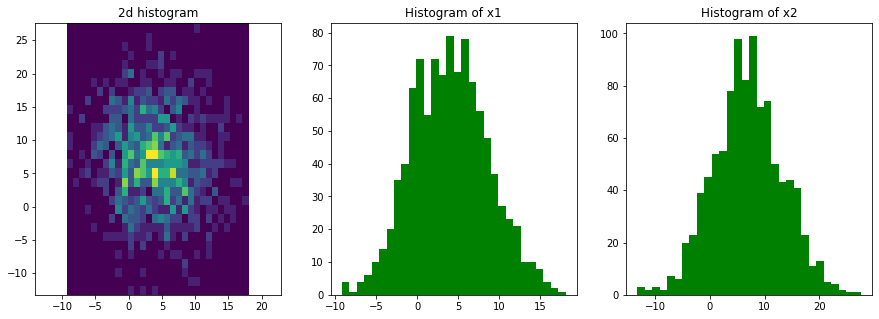

In [170]:
n = 1000
u1, u2 = np.random.rand(2, n)*2 - 1
for i in range(n):
  while u1[i]**2 + u2[i]**2 > 1:
    u1[i], u2[i] = np.random.rand(2) * 2 - 1
r = u1**2 + u2**2
z_0 = u1 * np.sqrt(- 2 * np.log(r)/r)
z_1 = u2 * np.sqrt(- 2 * np.log(r)/r)
x1 = (-2) * z_0 + 4 * z_1 + 4
x2 = 6 * z_0 + 2 * z_1 + 7
fig, pl = plt.subplots(1, 3, figsize=(15, 5))
pl[0].hist2d(x1, x2, bins=30)
pl[0].axis('equal')
pl[1].hist(x1, bins=30,color="green")
pl[2].hist(x2, bins=30,color="green")
pl[0].set_title("2d histogram")
pl[1].set_title("Histogram of x1")
pl[2].set_title("Histogram of x2")
plt.show()